## NO APPOINTMENT DATA ANALYSIS


#### INTRODUCTION

This dataset contains over 100k information of medical appointment of patients in Brazil and the focus is to investigate the factors that affects  patients attendance to their appointment. We are to explore and determine what could make a patient not attend his/her appointment. The dataset consist of 14 columns and below are the columns and their descriptions.

### Data Dictionary

    Column                     Description
       
    PatientId                Identification of each patient
    AppointmentID            Identification of each appointment
    Gender                   Male or Female
    ScheduleDay              What day did the patient set up for their appointment
    AppointmentDay           The day of the actual appointment, when they have to visit the doctor
    Age                      How old is the patient
    Neighbourhood            The location of the hopital
    Scholarship              Medical scholarship (True or False: 0 = False, 1 = True )
    Hpertension              True or False (0 = False, 1 = True)
    Diabetes                 True or False (0 = False, 1 = True)
    Alcoholism               True or False (0 = False, 1 = True)
    Handcap                  True or False (on a scal of 0 to 4)
    SMS_received             Messages sent to patients (0 = False, 1 = True)
    No-show                  Patients who attended or misseed their appointment (Yes=Missed, NO=Attended)
   
   
   
 ####  Questions
 
     1) Does gender affect if a person will show up for there scheduled appointment?
     2) Does age affect if a person will show up for there scheduled appointment?
     3) Does having a scholarship affect a patient showing up for his/her appointment?
     4) Does having a certain ailment affect if a patient will show up or not?
     5) How often do men show up as against women?




In [43]:



# importing of relevant libraries that will be used for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')

%matplotlib inline

In [44]:



# importing and reading of the file using pandas read_csv

data = pd.read_csv(r"C:\Users\Daisy Dickson\Desktop\Current Project\noshowappointments-kagglev2-may-2016.csv")
data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 
 
 
 
 ## Assessing the data

In [45]:




# Using the 'shape' funtion helps us know the number of rows and columns. 
# It shows that this dataset has 110,527 rows and 14 colums

data.shape

(110527, 14)

In [46]:



# The 'info'  function shows the datatypes, if there are null values and its count. 
# This helps us know if there are missing values.

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [47]:




# This is another way to check for missing values. From the output, it shows there are no missing values for each column

data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [48]:




# 'describe' function gives a statistical overview of the data. It shows the count, mean, standard deviation(std),
# min, the quadratile of 25%, 50% aand 75%

data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [49]:




# Checking the uniqueness of each column

data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [50]:




# let's assess the exact unique values of some of the columns

print('Gender', data.Gender.unique())
print('Scholarship', data.Scholarship.unique())
print('Handcap', data.Handcap.unique())
print('No-show', data['No-show'].unique())


Gender ['F' 'M']
Scholarship [0 1]
Handcap [0 1 2 3 4]
No-show ['No' 'Yes']






## Data Wrangling

In [51]:



# Renaming of some columns because of typos

data.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace = True)
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [52]:




# change all columns to lowercase for easy coding

data.columns = data.columns.str.lower()
data.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [53]:




# change the value of No_show to '0 = if patient showed up' and '1 = if patient did not show up'

data['no_show'] = data['no_show'].apply(lambda x: 0 if x == 'No' else 1)
data.head(10)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,0
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,1
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,0


In [54]:




# Change datetime to just date

data[['scheduledday','appointmentday']]=data[['scheduledday','appointmentday']].apply(pd.to_datetime);
data['scheduledday'] = data['scheduledday'].dt.strftime('%d-%m-%Y');
data['appointmentday'] = data['appointmentday'].dt.strftime('%d-%m-%Y');
data.head(10)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,29-04-2016,29-04-2016,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,29-04-2016,29-04-2016,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,29-04-2016,29-04-2016,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,29-04-2016,29-04-2016,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,29-04-2016,29-04-2016,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598513e+13,5626772,F,27-04-2016,29-04-2016,76,REPÚBLICA,0,1,0,0,0,0,0
6,7.336882e+14,5630279,F,27-04-2016,29-04-2016,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,27-04-2016,29-04-2016,39,GOIABEIRAS,0,0,0,0,0,0,1
8,5.639473e+13,5638447,F,29-04-2016,29-04-2016,21,ANDORINHAS,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,27-04-2016,29-04-2016,19,CONQUISTA,0,0,0,0,0,0,0


In [55]:



# create a waiting column

data['scheduledday']=pd.to_datetime(data['scheduledday'])
data['scheduleddate']=data['scheduledday'].dt.date

data['appointmentday']=pd.to_datetime(data['appointmentday'])
data['appointmentdate']=data['appointmentday'].dt.date

data['waiting_days']=(data['appointmentdate']- data['scheduleddate']).dt.days
data
#pd.options.mode.chained_assignment = None


C:\Users\Daisy Dickson\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-04-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Daisy Dickson\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-04-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Daisy Dickson\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-04-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Daisy Dickson\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-04-2016' in DD/MM/YYYY 

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduleddate,appointmentdate,waiting_days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-03-05,2016-07-06,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-03-05,2016-07-06,123
110523,3.596266e+12,5650093,F,2016-03-05,2016-07-06,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-03-05,2016-07-06,123
110524,1.557663e+13,5630692,F,2016-04-27,2016-07-06,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,2016-07-06,70
110525,9.213493e+13,5630323,F,2016-04-27,2016-07-06,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,2016-07-06,70


In [56]:
data.query('waiting_days<0')
data['waiting_days'][data.waiting_days<0]=0

In [57]:



# check for duplicates so it can be dropped

data.duplicated().sum() ## this shows there are no duplicates

0

In [58]:



# drop columns not necessary for our analysis

data.drop(['patientid','appointmentid'],axis = 1, inplace = True)

In [59]:



# check if there are rows with age less than o

data.query('age<0')   # one row was found with age = -1

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduleddate,appointmentdate,waiting_days
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0,2016-06-06,2016-06-06,0


In [60]:



# drop row with age less than 0

#wrong_age = data[data['age']== -1].index   # alternative way to drop the row
#data.drop(wrong_age, inplace = True)

data.drop(data.query('age<0').index, inplace=True)

In [61]:



# confirm row with age less than 0 has been dropped

data.query('age<0')     # age less than zero row has been removed

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduleddate,appointmentdate,waiting_days





## Exploratory Data Analysis

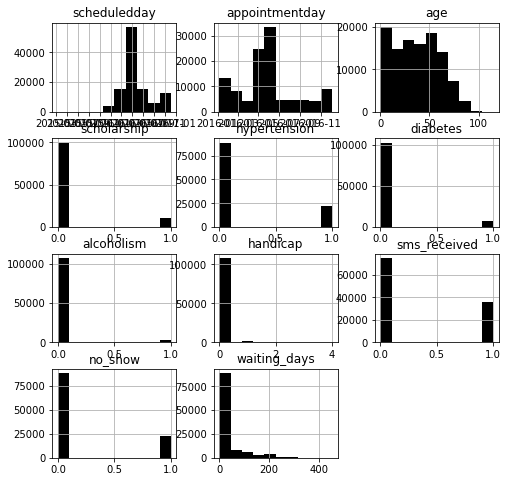

In [62]:



# generally assessing all numerical columns

data.hist(figsize=(8,8), color='black');

In [63]:



# assessing the correlation of the dataset columns 

data_corr = data.corr()
data_corr.style.background_gradient(cmap='coolwarm',axis=None)

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327,0.022862
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134,-0.011425
hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704,0.003502
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181,-0.001493
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197,-0.017295
handicap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077,-0.010623
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428,0.279359
no_show,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000,0.116950
waiting_days,0.022862,-0.011425,0.003502,-0.001493,-0.017295,-0.010623,0.279359,0.116950,1.000000


<AxesSubplot:>

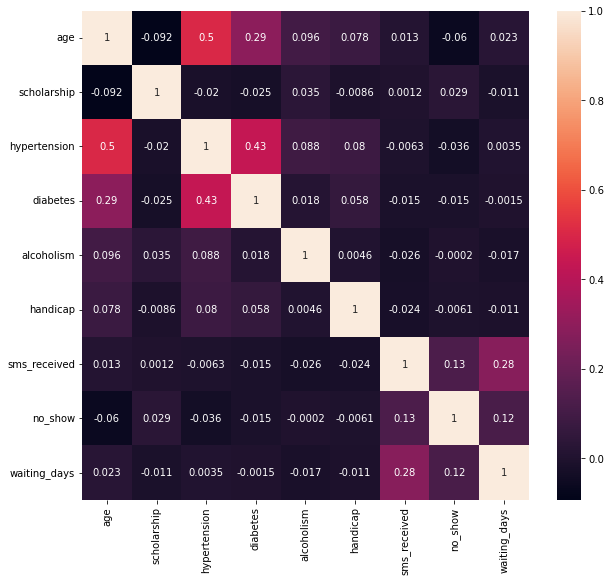

In [64]:



# using heatmap to check correlation

f, ax=plt.subplots(figsize=(10,9))
data_corr = data.corr()
sns.heatmap(data_corr,annot=True)

0    88207
1    22319
Name: no_show, dtype: int64


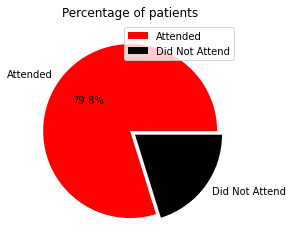

In [65]:



# total number of patients that attended or did not attend their appointment in percentage

patients = data.no_show.value_counts()
print(patients)

plt.pie(patients, labels = ['Attended', 'Did Not Attend'], autopct = '%1.1f%%', explode = (0, 0.07), colors =['red','black']);
plt.title('Percentage of patients')
plt.legend();




###   1) Does gender affect if a person will show up for there scheduled appointment?

In [66]:



# the mean of genders that show up or not against health conditions

pv=pd.pivot_table(data,index=['gender','no_show'])
pv

age  alcoholism  diabetes  handicap  hypertension  \
gender no_show                                                            
F      0        39.591126    0.015984  0.080164  0.019792      0.221539   
       1        36.162190    0.021105  0.069686  0.018569      0.182061   
M      0        34.461372    0.057102  0.062141  0.028196      0.172696   
       1        30.833010    0.047767  0.053463  0.023560      0.144337   

                scholarship  sms_received  waiting_days  
gender no_show                                           
F      0           0.117862      0.305389     26.900009  
       1           0.144306      0.460463     43.356516  
M      0           0.049609      0.265358     24.436018  
       1           0.061100      0.396634     40.897735

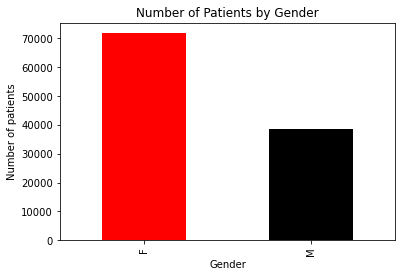

In [67]:



# total number of patients by their gender

data.gender.value_counts().plot(kind = 'bar',color = ['red', 'black'])
plt.ylabel('Number of patients')
plt.xlabel('Gender')
plt.title('Number of Patients by Gender')
plt.show();

F    71839
M    38687
Name: gender, dtype: int64
gender  no_show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: no_show, dtype: int64


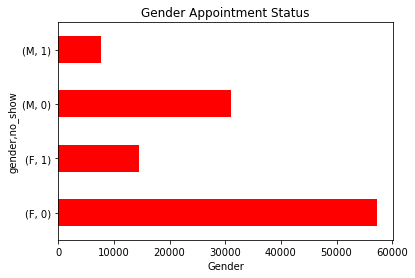

In [68]:



#category of genders that showed up or not

gender_count = data.gender.value_counts()
print(gender_count)

gender_no_show_count = data.groupby('gender').no_show.value_counts()
print(gender_no_show_count)

data.groupby('gender').no_show.value_counts().plot(kind='barh', color=['red']);
plt.title('Gender Appointment Status')
plt.xlabel('Gender')
plt.show()





###  2) Does age affect if a person will show up for there scheduled appointment?

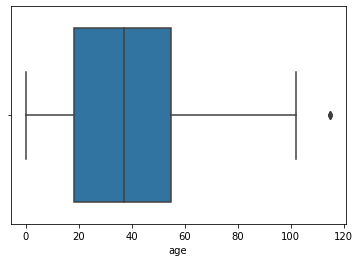

In [69]:
#chech for outlier for age

sns.boxplot(data=data, x='age');

In [70]:



# using age range instead of actual age
#code for converting age to age range for this dataset

def age_range(x):
    if x<20:
        return '0-19'
    elif x<40:
        return '20-39'
    elif x<60:
        return '40-59'
    elif x<80:
        return '59-79'
    elif x>=80:
        return '80+'
    else:
        return 'other'
data['agerange']= data.age.apply(age_range)
data

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduleddate,appointmentdate,waiting_days,agerange
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0,59-79
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,40-59
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,59-79
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0-19
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,0,40-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-03-05,2016-07-06,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-03-05,2016-07-06,123,40-59
110523,F,2016-03-05,2016-07-06,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-03-05,2016-07-06,123,40-59
110524,F,2016-04-27,2016-07-06,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,2016-07-06,70,20-39
110525,F,2016-04-27,2016-07-06,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,2016-07-06,70,20-39


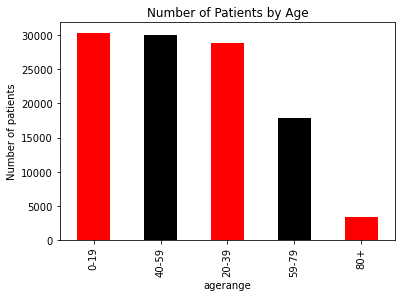

In [71]:



# Number of ages 
# it shows that majority of patients are between 0-60 years old

data.agerange.value_counts().plot(kind = 'bar',color = ['red', 'black'])
plt.ylabel('Number of patients')
plt.xlabel('agerange')
plt.title('Number of Patients by Age')
plt.show();

0-19     30411
40-59    30072
20-39    28870
59-79    17810
80+       3363
Name: agerange, dtype: int64
agerange  no_show
0-19      0          23670
          1           6741
20-39     0          22190
          1           6680
40-59     0          24416
          1           5656
59-79     0          15118
          1           2692
80+       0           2813
          1            550
Name: no_show, dtype: int64


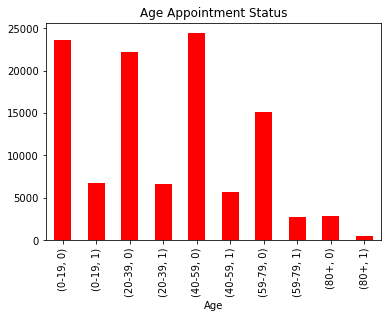

In [72]:



# age againdt appointment status
# it shows that patients from 0-60 years old showed up for their appointments

age_count = data.agerange.value_counts();
print(age_count);

age_no_show_count = data.groupby('agerange').no_show.value_counts()
print(age_no_show_count);

data.groupby('agerange').no_show.value_counts().plot(kind='bar', color=['red']);
plt.title('Age Appointment Status')
plt.xlabel('Age')
plt.show()




### 3) Does having a scholarship affect a patient showing up for his/her appointment?

             count       
               age       
no_show          0      1
scholarship              
0            79924  19741
1             8283   2578


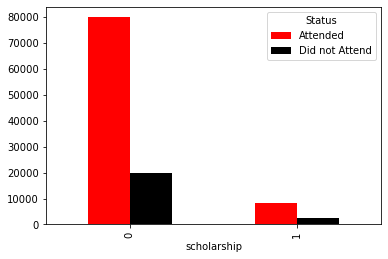

In [73]:



# Number of patients with scholarship that attended or not
sch= pd.pivot_table(data=data, index=['scholarship'],columns='no_show',values=['age'],aggfunc=['count'])
print(sch)

sch.plot(kind='bar',color=['red','black'])
plt.legend(title='Status',labels=['Attended','Did not Attend']);

 
    
    
### 4) Does having a certain ailment affect if a patient will show up or not?

C:\Users\Daisy Dickson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daisy Dickson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Daisy Dickson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

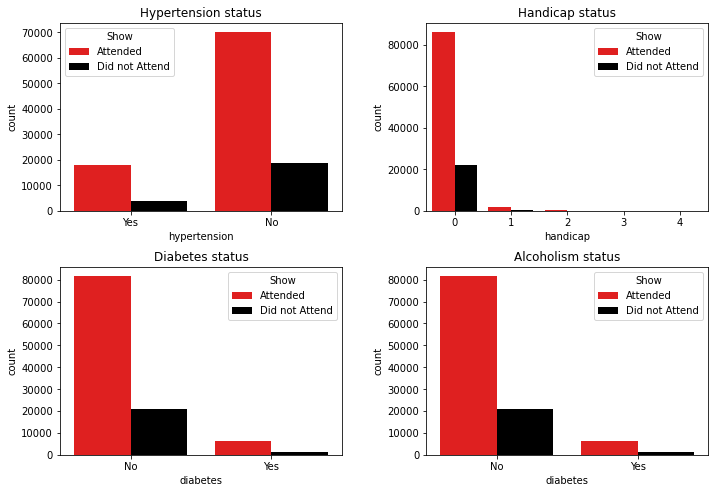

In [74]:



# using subplots to assess patients with or without health challenges that showed up for their appointment or did not.

plt.subplot(2,2,1)
hypertension=data['hypertension'].map({0:'No',1:'Yes'})
sns.countplot(hypertension, data=data,hue='no_show',palette=['red','black'])
plt.title('Hypertension status')
plt.legend(title='Show',labels=['Attended','Did not Attend'])

plt.subplot(2,2,2)
handicap=data['handicap']
sns.countplot(handicap, data=data,hue='no_show',palette=['red','black'])
plt.title('Handicap status')
plt.legend(title='Show',labels=['Attended','Did not Attend'])

plt.subplot(2,2,3)
diabetes=data['diabetes'].map({0:'No',1:'Yes'})
sns.countplot(diabetes, data=data,hue='no_show',palette=['red','black'])
plt.title('Diabetes status')
plt.legend(title='Show',labels=['Attended','Did not Attend'])


plt.subplot(2,2,4)
alcoholism=data['alcoholism'].map({0:'No',1:'Yes'})
sns.countplot(diabetes, data=data,hue='no_show',palette=['red','black'])
plt.title('Alcoholism status')
plt.legend(title='Show',labels=['Attended','Did not Attend'])

plt.subplots_adjust(left=0,right=1.5,bottom=0,top=1.5,wspace=0.3,hspace=0.3)

pd.options.mode.chained_assignment = None

### 5) How often do women show up as against men?


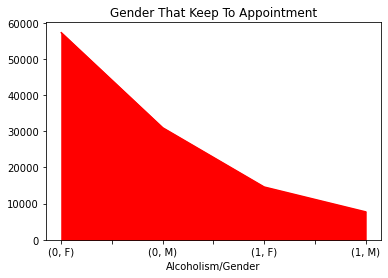

In [75]:



# gender against appointment status

data.groupby('no_show').gender.value_counts().plot(kind='area', color=['red']);
plt.title('Gender That Keep To Appointment')
plt.xlabel('Alcoholism/Gender')
plt.show()

### Other Findings

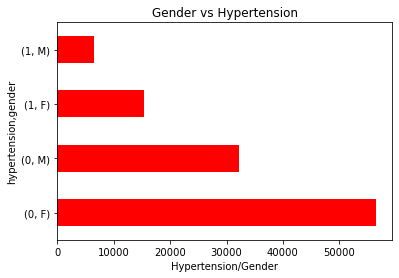

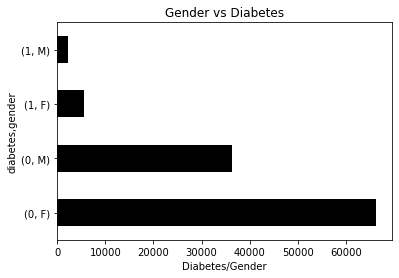

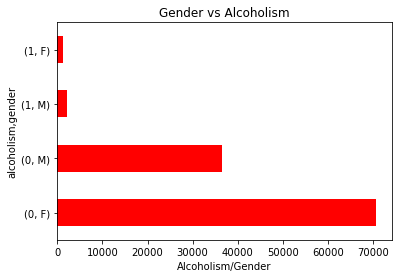

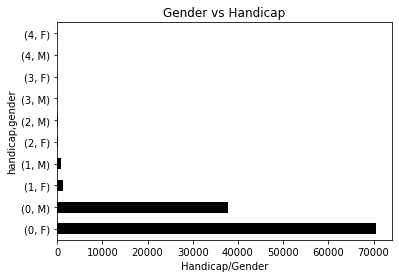

In [76]:



# gender againts health challenges

data.groupby('hypertension').gender.value_counts().plot(kind='barh', color=['red']);
plt.title('Gender vs Hypertension')
plt.xlabel('Hypertension/Gender')
plt.show()

data.groupby('diabetes').gender.value_counts().plot(kind='barh', color=['black']);
plt.title('Gender vs Diabetes')
plt.xlabel('Diabetes/Gender')
plt.show()

data.groupby('alcoholism').gender.value_counts().plot(kind='barh', color=['red']);
plt.title('Gender vs Alcoholism')
plt.xlabel('Alcoholism/Gender')
plt.show()

data.groupby('handicap').gender.value_counts().plot(kind='barh', color=['black']);
plt.title('Gender vs Handicap')
plt.xlabel('Handicap/Gender')
plt.show()
#data.groupby('gender')['hypertension'].mean().plot(kind='bar')

0    75044
1    35482
Name: sms_received, dtype: int64


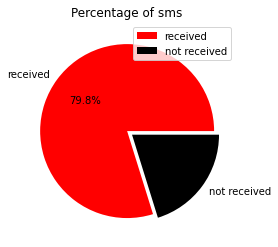

In [77]:



# this plot shows that majority received sms
sms = data.sms_received.value_counts()
print(sms)

plt.pie(patients, labels = ['received', 'not received'], autopct = '%1.1f%%', explode = (0, 0.07), colors =['red','black']);
plt.title('Percentage of sms')
plt.legend();

              count       
                age       
no_show           0      1
sms_received              
0             62509  12535
1             25698   9784


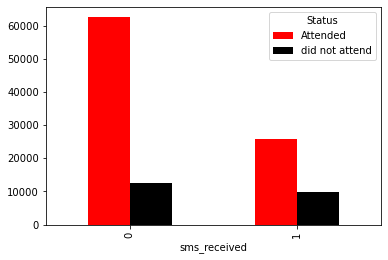

In [78]:



# majority of patients that received sms attended their apointment

sms_received= pd.pivot_table(data=data, index=['sms_received'],columns='no_show',values=['age'],aggfunc=['count'])
print(sms_received)

sms_received.plot(kind='bar',color=['red','black'])
plt.legend(title='Status',labels=['Attended','did not attend']);

              count       
                age       
gender            F      M
hypertension              
0             56500  32225
1             15339   6462
          count       
            age       
gender        F      M
diabetes              
0         66233  36350
1          5606   2337
          count       
            age       
gender        F      M
handicap              
0         70549  37736
1          1181    861
2           105     78
3             3     10
4             1      2
            count       
              age       
gender          F      M
alcoholism              
0           70616  36550
1            1223   2137


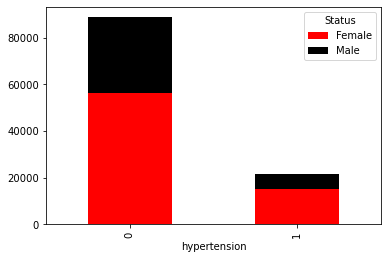

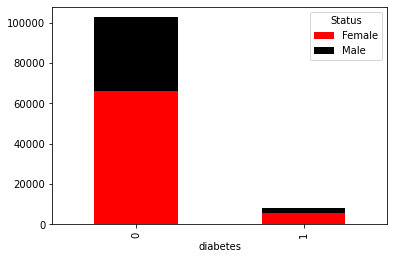

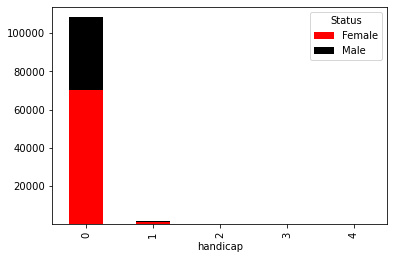

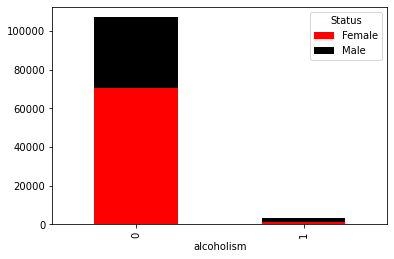

In [79]:




# gender with highest health challenges

# hypertension

hyp= pd.pivot_table(data=data, index=['hypertension'],columns='gender',values=['age'],aggfunc=['count'])
print(hyp)

hyp.plot(kind='bar', stacked=True, color=['red','black']);
plt.legend(title='Status',labels=['Female','Male']);


# diabetes

dia= pd.pivot_table(data=data, index=['diabetes'],columns='gender',values=['age'],aggfunc=['count'])
print(dia)

dia.plot(kind='bar',stacked=True, color=['red','black']);
plt.legend(title='Status',labels=['Female','Male']);


# handicap

han= pd.pivot_table(data=data, index=['handicap'],columns='gender',values=['age'],aggfunc=['count'])
print(han)

han.plot(kind='bar',stacked=True, color=['red','black']);
plt.legend(title='Status',labels=['Female','Male']);


# alcoholism
ach= pd.pivot_table(data=data, index=['alcoholism'],columns='gender',values=['age'],aggfunc=['count'])
print(ach)

ach.plot(kind='bar',stacked=True, color=['red','black']);
plt.legend(title='Status',labels=['Female','Male']);

<AxesSubplot:xlabel='waiting_days,no_show'>

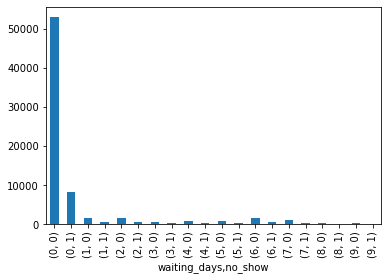

In [80]:
wait= data.query('waiting_days<10')
wait.groupby('waiting_days')['no_show'].value_counts().plot(kind='bar')

#wait=data.groupby('waiting_days').value_counts()
#plt.plot(wait);


### Conclusion

* The dataset record more of female patients to male and it shows that females showed up mor for their appointments.
* There is 50% correlation between age and hypertension. Majority of patients between 0-60 years old showed up for their appointment
* Another unexpected outcome is majority of patients without scholarship showed up for their appointment
* The rate of patients who did not receive sms yet showed up is high which wasn't expected
* More women suffer from hypertension and diabetes compared to men


### Limitations

* This dataset is insufficient to draw unbiased conclusion. It contains information of just 3 months in 2016
* The column 'No_show' values of 'no - showed up' and 'yes - did not show up' was very confusing. Took time to understand
* There are outliers and age that is less than 0. Rows with less than 0 was removed
